In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.preprocessing import LabelEncoder

In [3]:
# Importing the data in dataframe
DATA_DIR_PATH = '/opt/cs145442/data/google-play-store-apps/'
GOOGLE_PLAY_STORE_FILENAME = 'googleplaystore.csv'
GOOGLE_PLAY_STORE_USER_REVIEWS_FILENAME = 'googleplaystore_user_reviews.csv'

ps_df = pd.read_csv(DATA_DIR_PATH + GOOGLE_PLAY_STORE_FILENAME)
ps_user_reviews_df = pd.read_csv(DATA_DIR_PATH + GOOGLE_PLAY_STORE_USER_REVIEWS_FILENAME)

In [5]:
ps_user_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [8]:
ps_df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


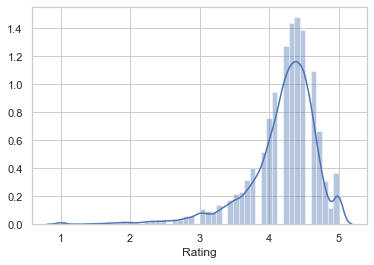

In [20]:
sns.distplot(ps_df[ps_df['Rating'] <= 5]['Rating'])

In [28]:
total_null = ps_df.isnull().sum()
percentage_null = total_null / (ps_df.isnull().count())
pd.concat([total_null, percentage_null], axis = 1, keys=['Total', 'Percent'])

,Total,Percent
App,0,0.000000
Category,0,0.000000
Rating,1474,0.135965
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000
Type,1,0.000092
Price,0,0.000000
Content Rating,1,0.000092
Genres,0,0.000000


In [30]:
# Dropping the null values
ps_df.dropna(inplace=True)

Text(0.5, 1, 'Rating vs Category [BoxPlot]')

<Figure size 720x720 with 0 Axes>

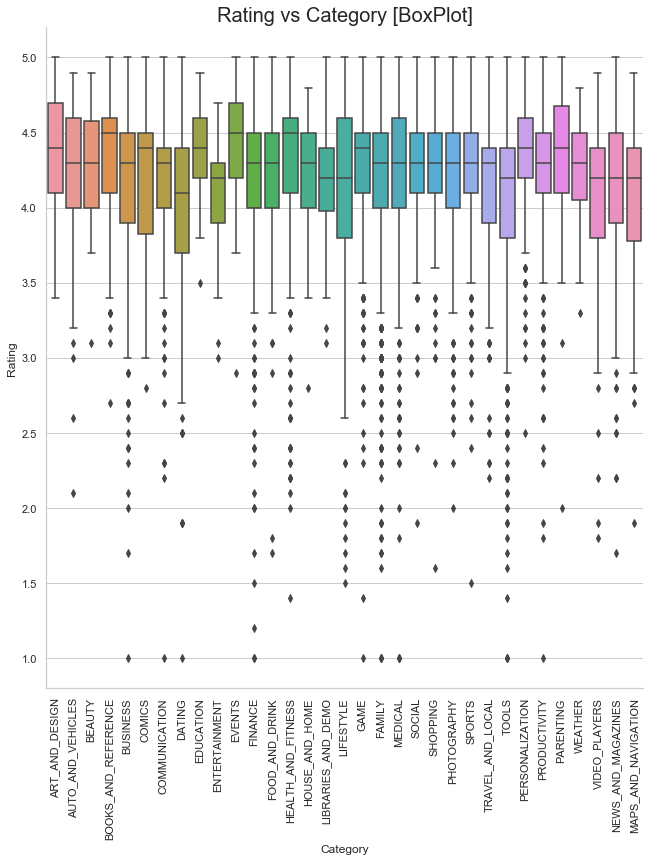

In [36]:
# Plotting Box plot between Rating and Category
plt.figure(figsize=(10,10))
cat = sns.catplot(x='Category', y='Rating', data=ps_df, kind='box', height=10)
cat.set_xticklabels(rotation=90)
plt.title('Rating vs Category [BoxPlot]', size=20)

### It's clearly observable we have highest overall ratings for three categories
* BOOKS_AND_REFERENCE
* EVENTS
* HEALTH_AND_FITNESS

In [38]:
# Cleaning the Installs column
ps_df['Installs'] = ps_df['Installs'].str.replace(',', '')
ps_df['Installs'] = ps_df['Installs'].str.replace('+', '')
ps_df['Installs'] = ps_df['Installs'].astype(int)

In [41]:
# Label Encoding the column to reduce the effect of large range of values
le = LabelEncoder()
ps_df['Installs'] = le.fit_transform(ps_df['Installs'])

Text(0.5, 1.0, 'Rating vs Installs [RegPlot]')

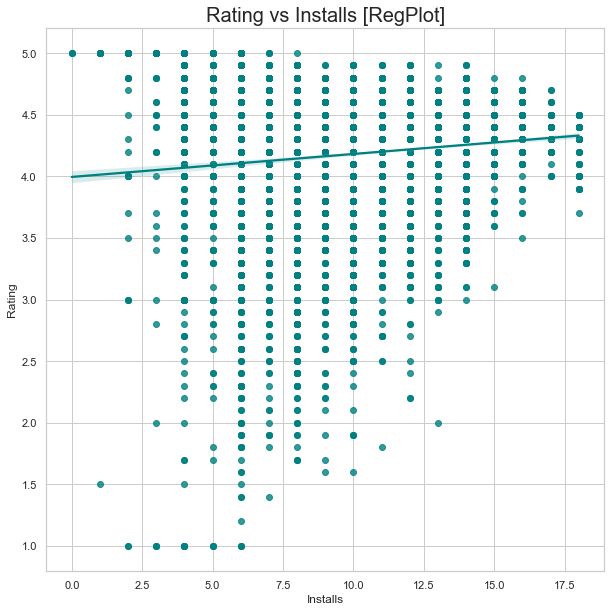

In [43]:
# Plotting the Rating vs Install
plt.figure(figsize=(10,10))
sns.regplot(x="Installs", y="Rating", color='teal', data=ps_df)
plt.title('Rating vs Installs [RegPlot]', size=20)

In [47]:
# Cleaning the Price column
ps_df['Price'] = ps_df['Price'].str.replace('$', '')
ps_df['Price'] = ps_df['Price'].astype(float)

Text(0.5, 1.0, 'Rating vs Price [RegPlot]')

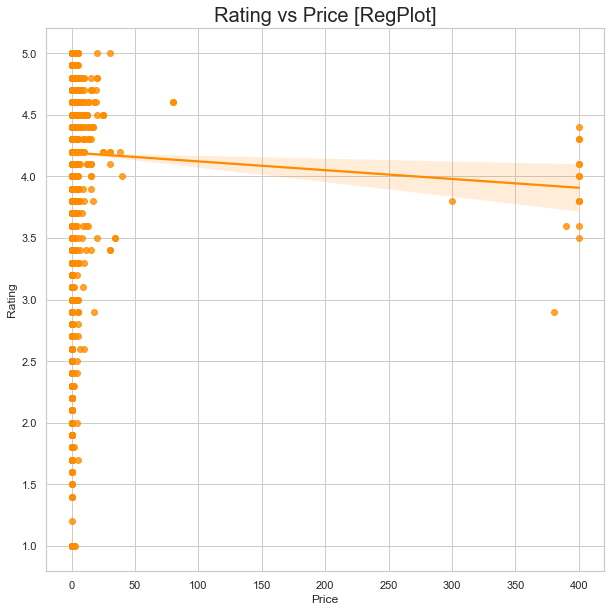

In [48]:
# Plotting the Rating vs Price
plt.figure(figsize=(10,10))
sns.regplot(x="Price", y="Rating", color='darkorange', data=ps_df)
plt.title('Rating vs Price [RegPlot]', size=20)